# Review
Hi, my name is Dmitry and I will be reviewing your project.

You can find my comments in colored markdown cells:

<div class="alert alert-success">
    If everything is done succesfully.
</div>

<div class="alert alert-warning">
    If I have some (optional) suggestions, or questions to think about, or general comments.
</div>

<div class="alert alert-danger">
    If a section requires some corrections. Work can't be accepted with red comments.
</div>

Please don't remove my comments, as it will make further review iterations much harder for me.

Feel free to reply to my comments or ask questions using the following template:

<div class="alert alert-info">
    For your comments and questions.
</div>

First of all, thank you for turning in the project! You did a pretty good job overall, there's just one small problem: the numbers in the clustering section conclusions are in disconnect with the numbers in the cell outputs. It should be very straightforward to fix though!


<div class="alert alert-success">
    <b>V2.</b>
    Hi! Thanks for taking the time to improve the project! Now it's accepted. Good luck on the next sprint!
</div>


# Churn Prediction Project

## Project description
1. The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.
2. For a gym, it makes sense to say a customer has left if they don't come for a month.<br> Usually, if a customer joins, comes a few times, then disappears, they're unlikely to come back.
* The task is to analyze them and come up with a customer retention strategy.

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import numpy as np
from sklearn.metrics import roc_auc_score

### Open and read CSV file containing gym customers' data

In [22]:
customers_data_df = pd.read_csv('/datasets/gym_churn_us.csv')
customers_data_df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


## Step 2. Carry out exploratory data analysis (EDA)

### Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the describe() method).

In [3]:
customers_data_df.info()
customers_data_df[customers_data_df.isna().any(axis=1)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn


<span style="background-color: #FFFF00"> None missing values have been found </span>

In [4]:
customers_data_df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


1. Gender mean = 0.51 Number of male and female customers are equal
2. Near Location Mean = 0.85 Majority of customers work/live near the gym
3. Partner Mean = 0.49 Almost half of customers have partner's discount
4. Promo Friends Mean = 0.30 One third of the customers were acquired through "Bring Friend" promo
5. Contract Period Mean = 4.7 Month average lenght of contract
6. Group Visits Mean = 0.41 Almost half of customer visit group classes
7. Age Mean = Customers' average age is 29 years old
8. Lifetime Mean = Custorm's average lifetime is 3.7 months 
9. Churn Mean = On average 0.27 of customers leave the gym

## Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).

In [5]:
churn_features = customers_data_df.groupby('Churn').mean()
churn_features

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


1. Gender mean = 0.51 Number of male and female customers who leave the gym is equal
2. Near Location Mean for those who stay = 0.87 <br> Near Location Mean for those who leave = 0.77<br><span style="background-color: #FFFF00"> That means the distence has very low effect on customers leave/stay</span>
                    
3. Partner Mean For thouse who Stay = 0.54<br> Partner Mean For thouse who Leave = 0.36<br><span style="background-color: #FFFF00"> It says that customers acquired who have discount are more likely to stay</span>

4. Promo Friends Mean For thouse who Stay = 0.35<br> Promo Friends Mean For thouse who Leave = 0.18<br><span style="background-color: #FFFF00"> Customers who come through "Bring Friend" promo are more likely to stay</span>

5. Contract Period Mean For thouse who Stay = 5.7 month <br>  Contract Period Mean For thouse who Leave = 1.7<br><span style="background-color: #FFFF00"> It's clear that the longer contract period the more likely customers to stay with us</span>

6. Group Visits Mean For thouse who Stay = 0.46<br> Group Visits Mean For thouse who Leave = 0.27<br><span style="background-color: #FFFF00"> Customers participating in group classes are more likely to stay</span>

7. Age Mean For thouse who Stay = 30 years old <br> Age Mean For thouse who Leave = 27 years old <br><span style="background-color: #FFFF00"> Yunger customers are more likely to leave</span>

8. Lifetime Mean For thouse who Stay = 4.7 months <br> Lifetime Mean For thouse who Leave = 1 month <br><span style="background-color: #FFFF00"> If costumer stays more then 1 month it's more likely he/she would stay with us</span>


## Plot bar histograms and feature distributions for those who left (churn) and those who stayed.

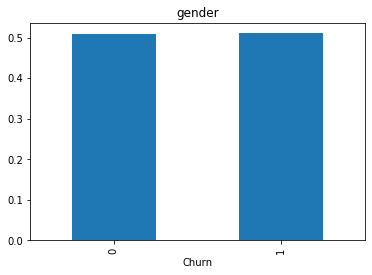

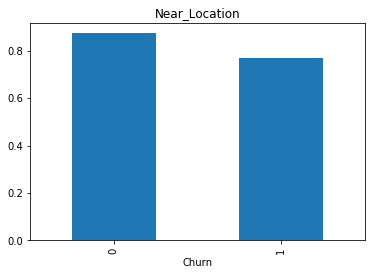

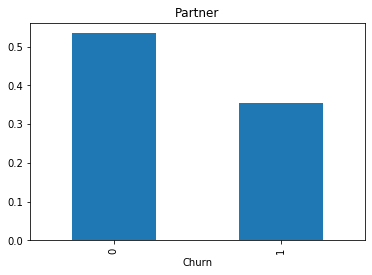

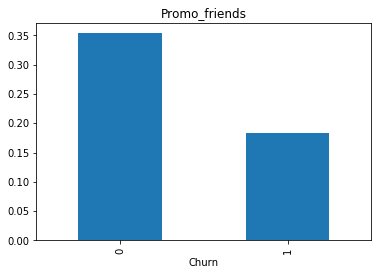

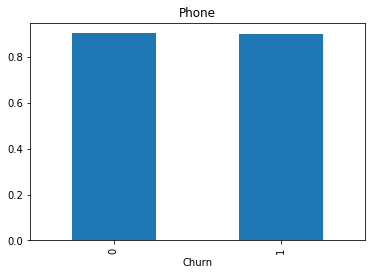

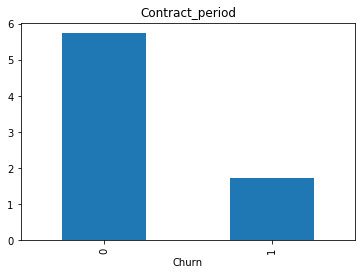

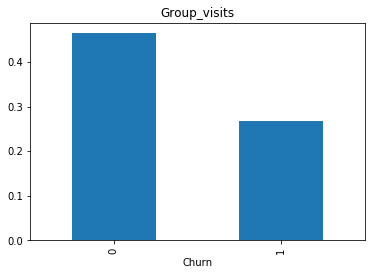

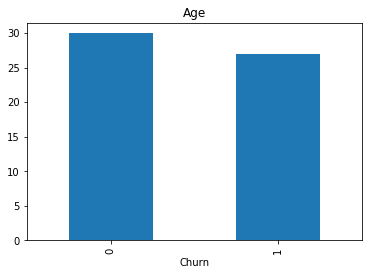

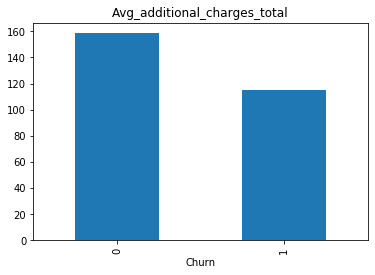

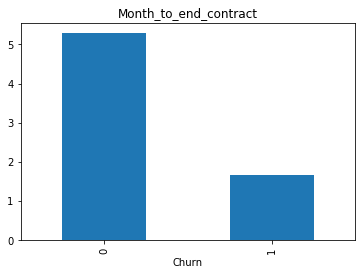

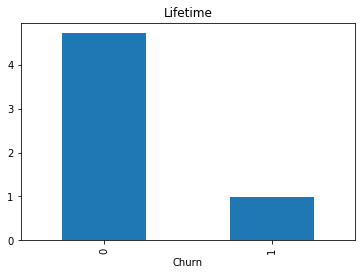

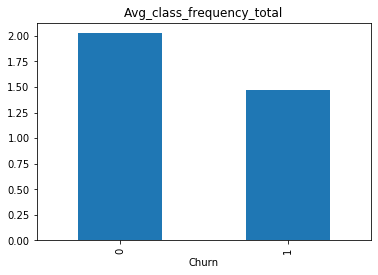

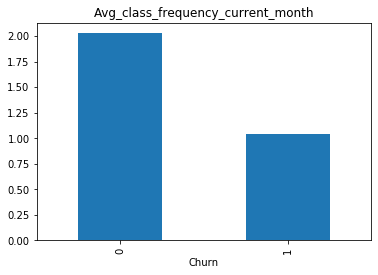

In [6]:
for (columnName, columnData) in churn_features.iteritems():
    columnData.plot(kind='bar', title=columnName)
    plt.show()


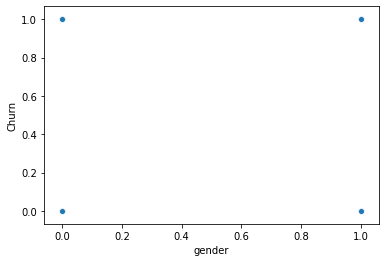

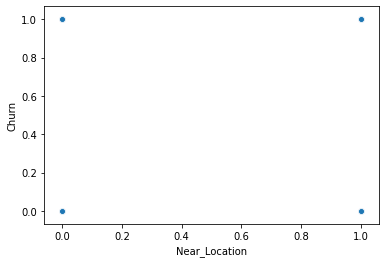

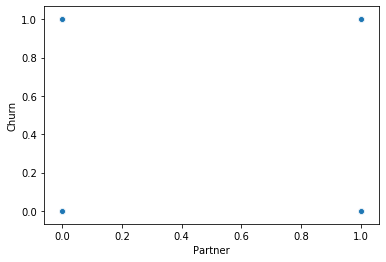

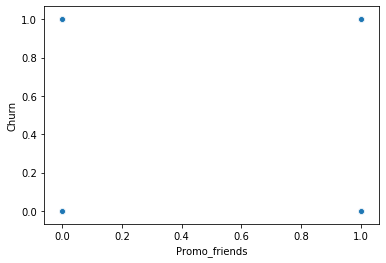

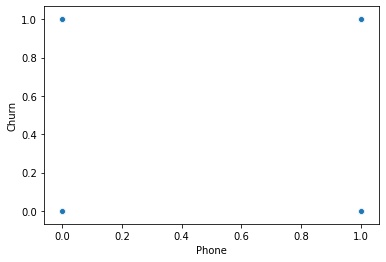

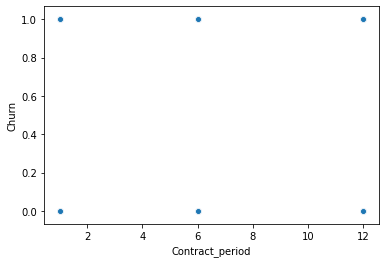

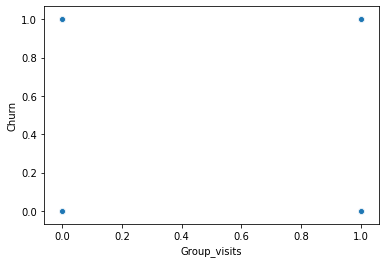

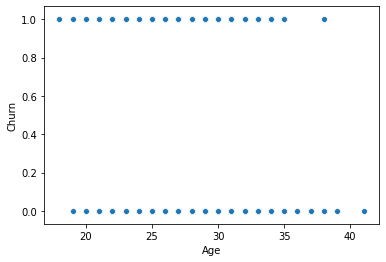

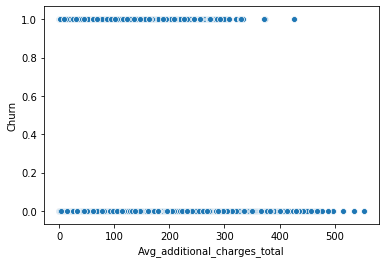

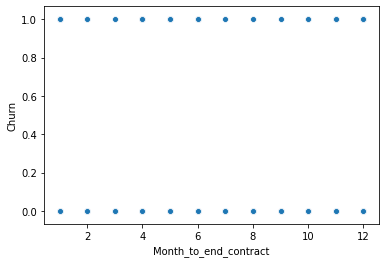

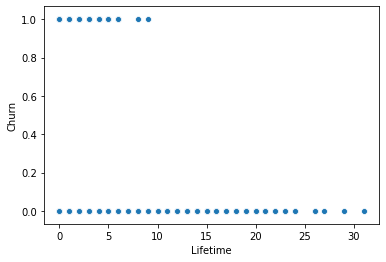

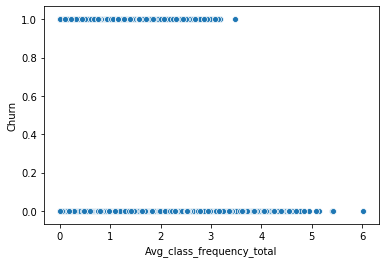

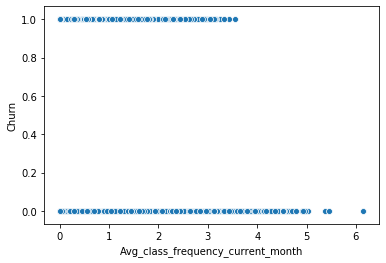

In [7]:
for col in customers_data_df.drop('Churn', axis = 1).columns:
    sns.scatterplot(customers_data_df[col], customers_data_df['Churn'])
    plt.show()

<b>Histograms and Feature Distribution just illustrate the conclusions made above</b>

## Build a correlation matrix and display it.

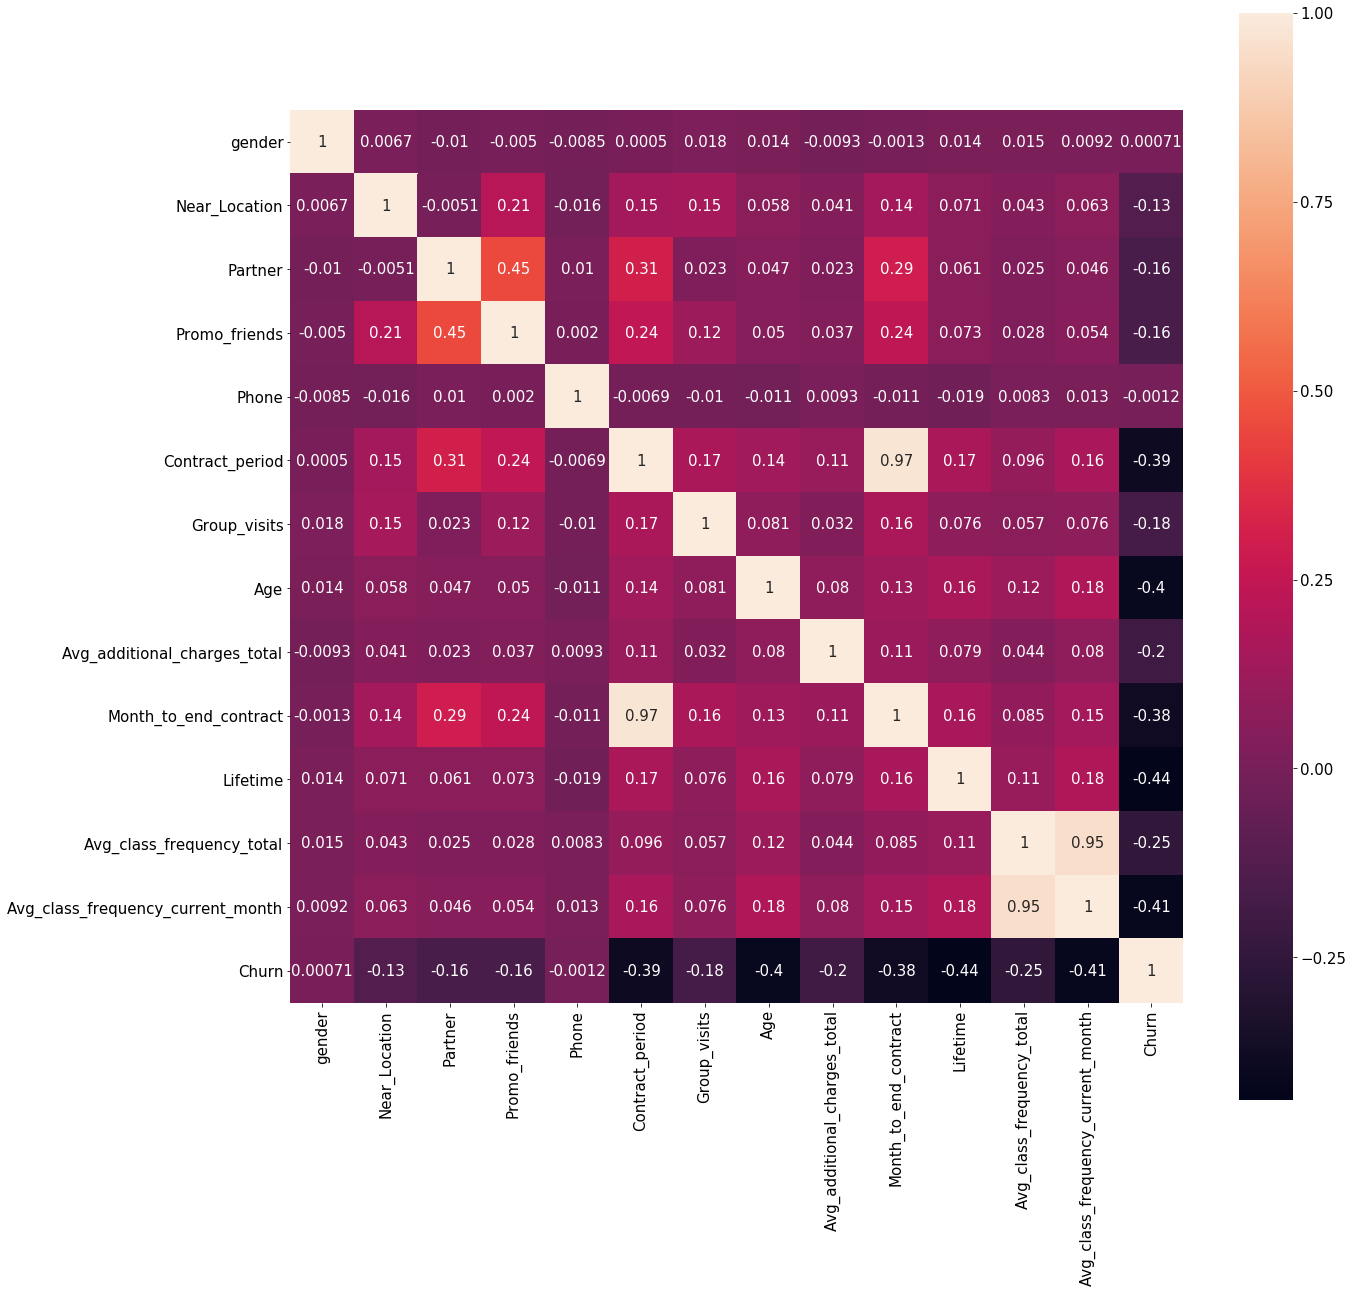

In [8]:
plt.figure(figsize = (20,20))
plt.rcParams.update({'font.size': 15})
corr_m = customers_data_df.corr()

sns.heatmap(
    corr_m, 
    square = True, 
    annot = True
)

plt.show()

<div class="alert alert-success">
    Alright, you loaded the data and explored it a bit. Well done!
</div>

## Step 3. Build a model to predict user churn
### Build a binary classification model for customers where the target feature is the user's leaving next month.

### Divide the data into train and validation sets using the train_test_split() function.

In [9]:
X = customers_data_df.drop('Churn', axis = 1)
y = customers_data_df['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
print(X_train_st[:5])

[[-1.01511421  0.4175068   1.03175391  1.4800097   0.31628211  1.60502986
  -0.84769226  0.57944798  0.37161711  1.59173796  1.12734972  1.75580418
   1.61822807]
 [-1.01511421  0.4175068  -0.96922337 -0.67567125  0.31628211 -0.81299073
  -0.84769226  0.27046055 -1.09697378 -0.79568246  5.88138322 -0.2239674
  -0.01340886]
 [ 0.98511083  0.4175068   1.03175391 -0.67567125  0.31628211  1.60502986
  -0.84769226 -0.65650171 -1.18374157  1.83048     0.3350108  -0.84308456
  -0.80541199]
 [-1.01511421  0.4175068   1.03175391  1.4800097   0.31628211  0.28610954
  -0.84769226 -0.96548914 -0.95158829  0.39802775  1.39146269  0.66771379
   0.64605224]
 [-1.01511421  0.4175068  -0.96922337 -0.67567125 -3.16173427 -0.81299073
  -0.84769226 -0.03852687  0.97190435 -0.79568246  0.07089783 -0.19587934
  -0.16038147]]


<span style="background-color: #FFFF00">The data has been split into train and validation sets with proportion 80/20</span>
<span style="background-color: #FFFF00">Also, the data has been standardized to be used for further model training </span>

### Train the model on the train set with two methods:<br>Logistic regression<br>Random forest

In [10]:
X_test_st = scaler.transform(X_test)


model_logistic = LogisticRegression(random_state=0)
model_logistic.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

<span style="background-color: #FFFF00">The model has been trained with Logistic Regression</span>

In [11]:
model_randforest = RandomForestClassifier(random_state=0)
model_randforest.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

<span style="background-color: #FFFF00">The model has been trained with Random Forest</span>


## Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?

In [12]:
probabilities = model_logistic.predict_proba(X_test)[:,1]


predictions = model_logistic.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))
print('ROC_AUC: {:.2f}\n'.format(roc_auc_score(y_test, probabilities)))

Accuracy: 0.93
Precision: 0.86
Recall: 0.83
F1: 0.85
ROC_AUC: 0.97



In [13]:
prob = model_randforest.predict_proba(X_test)[:,1]

predic = model_randforest.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predic)))
print('Precision: {:.2f}'.format(precision_score(y_test, predic)))
print('Recall: {:.2f}'.format(recall_score(y_test, predic)))
print('F1: {:.2f}'.format(f1_score(y_test, predic)))
print('ROC_AUC: {:.2f}\n'.format(roc_auc_score(y_test, prob)))

Accuracy: 0.91
Precision: 0.83
Recall: 0.78
F1: 0.81
ROC_AUC: 0.95



### Which model gave better results?
<span style="background-color: #FFFF00">It's pretty much clear that Logistic Regression works better for our case:<br> It demonstrates Higher Accuracy, Precision, as well as ROC/AUC Score</span>


<div class="alert alert-success">
    The split into train and test set is reasonable. The scaler is used correctly. The test set is only used for evaluation of the models. Appropriate metrics were calculated and the conclusion is on point. Good job! 
</div>

## Step 4. Create user clusters
### Set aside the column with data on churn and identify object (user) clusters:

### Standardize the data.

In [14]:
cluster_df = customers_data_df.copy()

sc = StandardScaler()
x_sc = sc.fit_transform(cluster_df)

### Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Note: rendering the dendrogram may take time! Use the resulting graph to estimate the number of clusters you can single out.

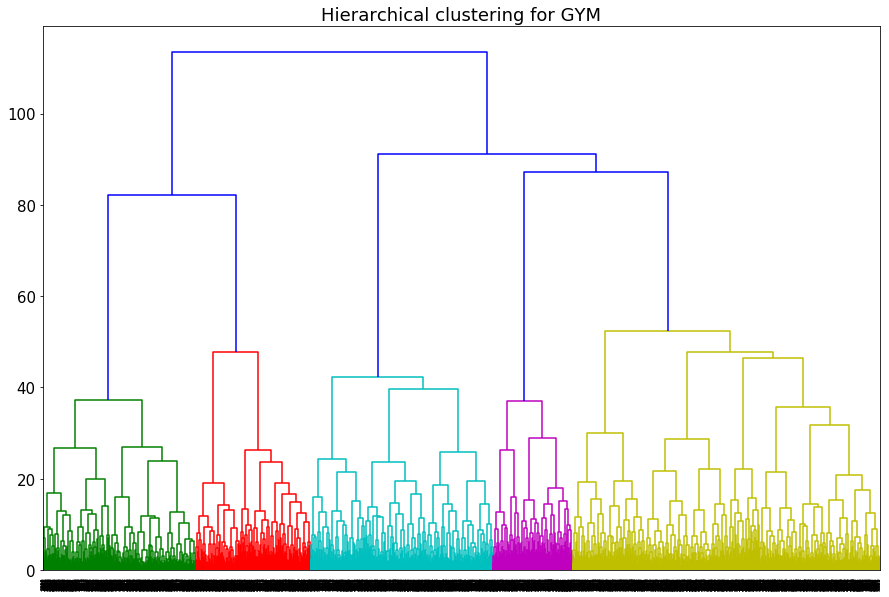

In [15]:
linked = linkage(x_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show()

* Dendrogram shows that the data has been split on 5 clusters

### Train the clustering model with the K-means algorithm and predict customer clusters. (Let the number of clusters be n=5

In [16]:

cluster = KMeans(n_clusters = 5, random_state=0)

labels = cluster.fit_predict(x_sc)

cluster_df['cluster_churn'] = labels

<span style="background-color: #FFFF00">The clustering model has been trained with K-Means algorithm.<br> The number of clusters used equals to 5<br> Also, the assigned customers' clustering numbers have been added to the dataframe </span>


### Look at the mean feature values for clusters. Does anything catch your eye?

In [17]:
Clusters_mean_features = cluster_df.groupby('cluster_churn').mean()
Clusters_mean_features

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_churn,,,,,,,,,,,,,,
0,0.503676,0.000000,0.459559,0.075368,0.917279,2.069853,0.211397,28.522059,132.741216,1.950368,2.757353,1.706629,1.515890,0.450368
1,0.492829,0.936115,0.764016,0.534550,0.919166,10.447197,0.516297,29.962190,161.853561,9.477184,4.833116,2.788103,2.786919,0.007823
2,0.507917,1.000000,0.323995,0.213155,0.903776,1.546894,0.287454,26.926918,113.173051,1.500609,1.031669,1.449720,1.037592,0.961023
3,0.521186,0.996610,0.282203,0.208475,0.904237,1.882203,0.452542,30.237288,157.988625,1.794915,4.923729,2.203432,2.207359,0.003390
4,0.518895,0.968023,0.744186,0.526163,0.873547,8.859012,0.534884,29.728198,162.907495,8.155523,4.411337,0.957744,0.943967,0.024709


<span style="background-color: #FFFF00">We can see that Customers from 5th cluster leave the gym with 96% likelihood<br> Also:<br> They have the shortest average contract period<br> They spend less money on additional products<br> They are of the yunger age then others, 27 years old<br>Those customers usually leave after the first month</span>

### Plot distributions of features for the clusters. Do you notice anything?

In [18]:
def show_clusters_on_plot(df, x_name,y_name, cluster_name):
    plt.figure(figsize = (10,10))
    sns.scatterplot(df[x_name], df[y_name],
           hue = df[cluster_name], palette = 'Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

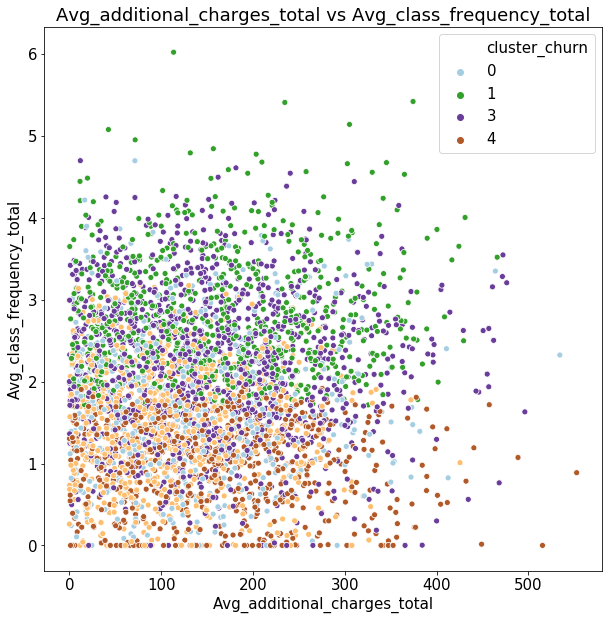

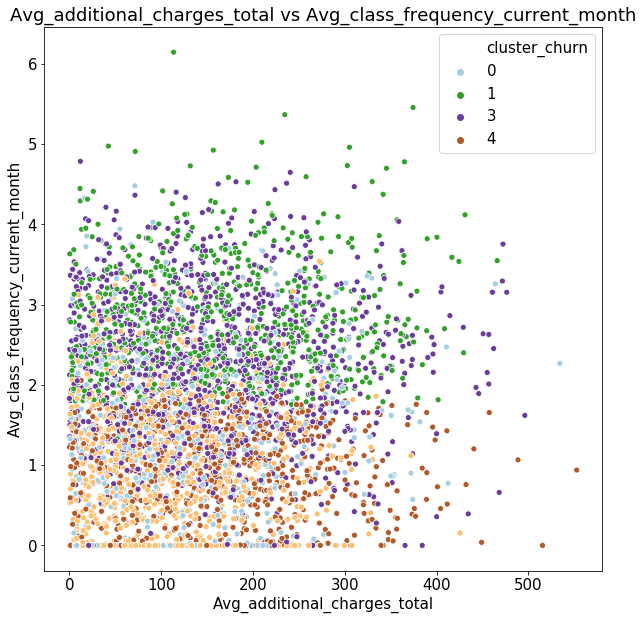

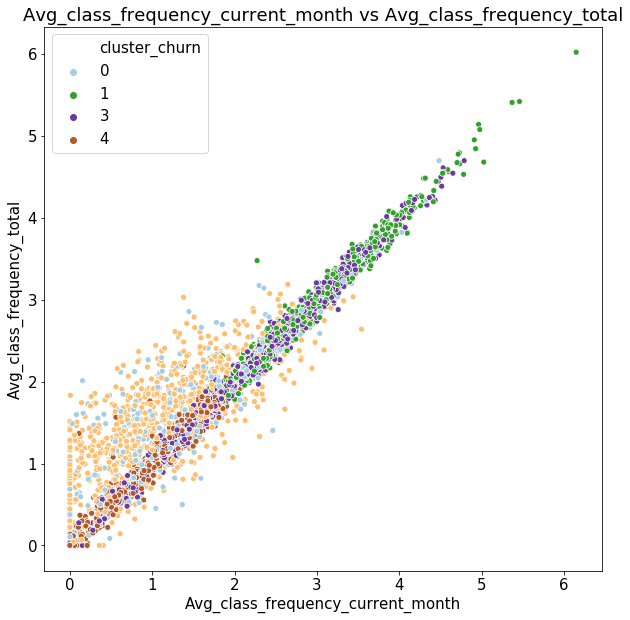

In [19]:
grouped_features = cluster_df.groupby('cluster_churn').mean().reset_index()

show_clusters_on_plot(cluster_df, x_name='Avg_additional_charges_total' ,
                      y_name='Avg_class_frequency_total',
                      cluster_name='cluster_churn')

show_clusters_on_plot(cluster_df, x_name='Avg_additional_charges_total' ,
                      y_name='Avg_class_frequency_current_month',
                      cluster_name='cluster_churn')

show_clusters_on_plot(cluster_df, x_name='Avg_class_frequency_current_month' ,
                      y_name='Avg_class_frequency_total',
                      cluster_name='cluster_churn')

<span style="background-color: #FFFF00">What we find here is that there's stron correlation between average class frequency in current month and average class frequency over all. That's very interesting and important metrics because, as we found it leter, the customers will leave the gym with 99% likelyhood if they visit group classes as rare as one a month.</span>

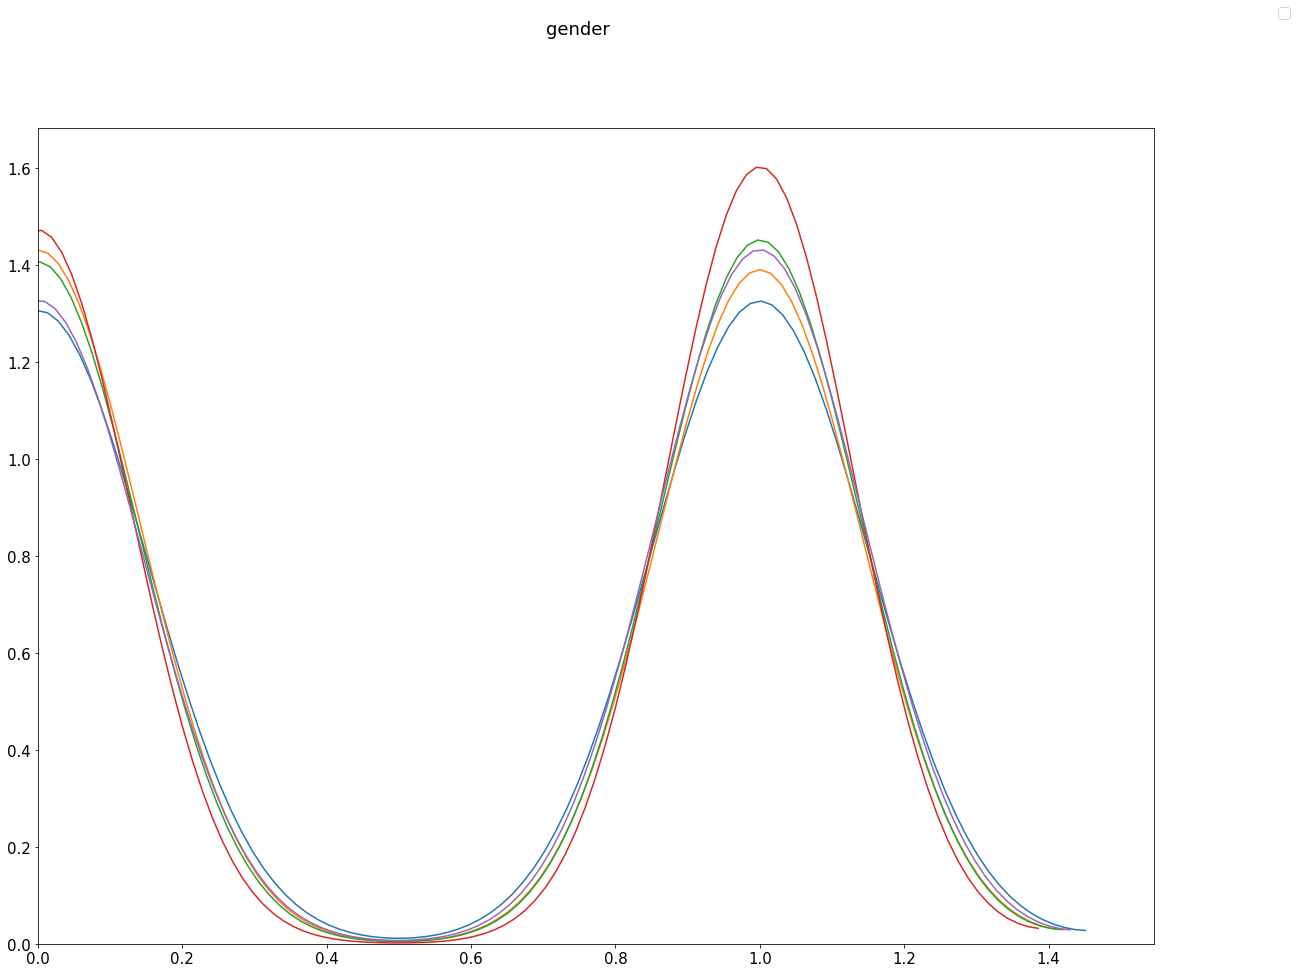

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


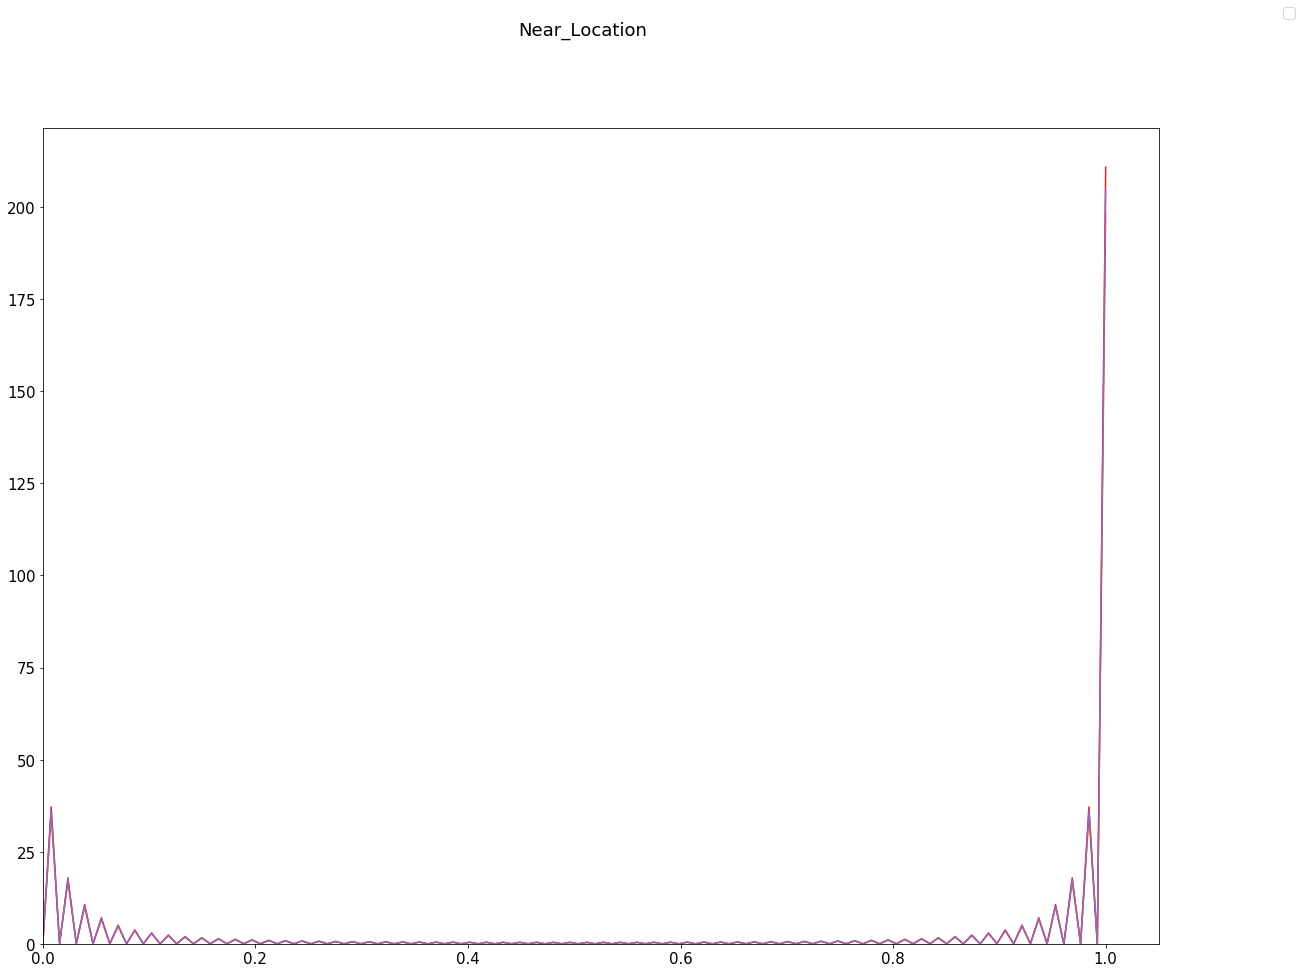

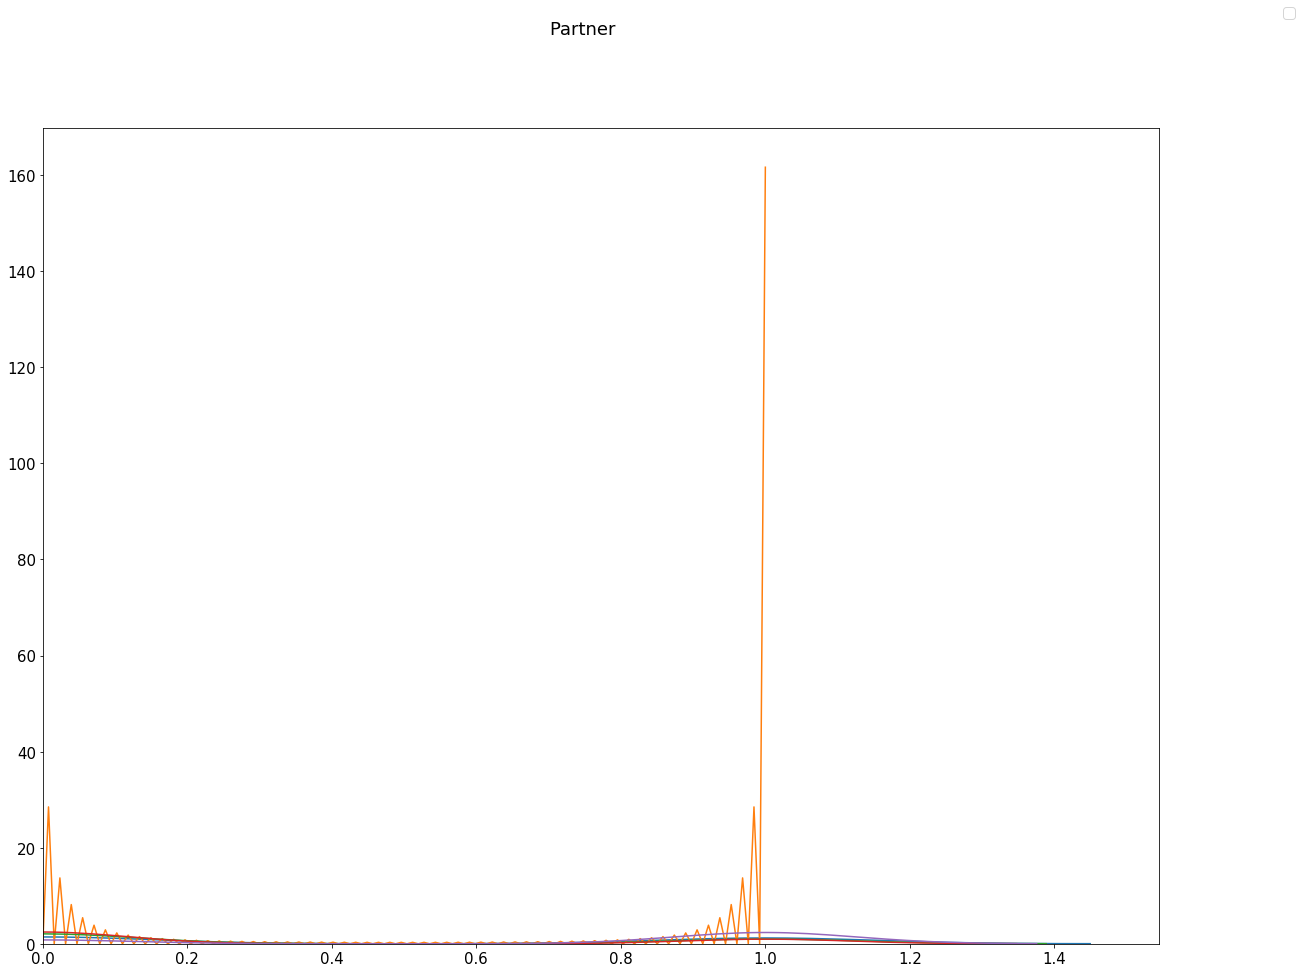

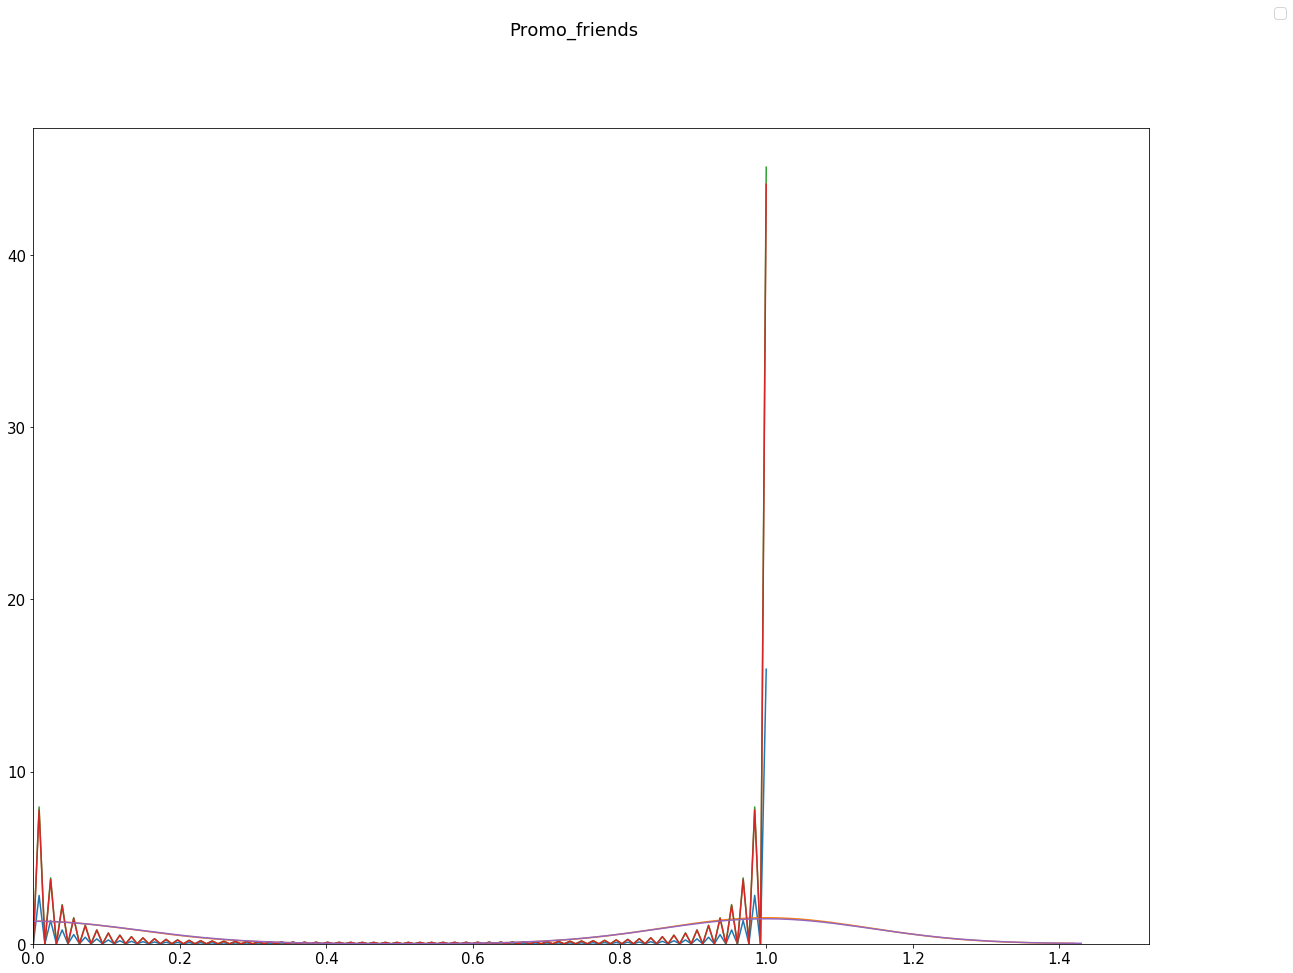

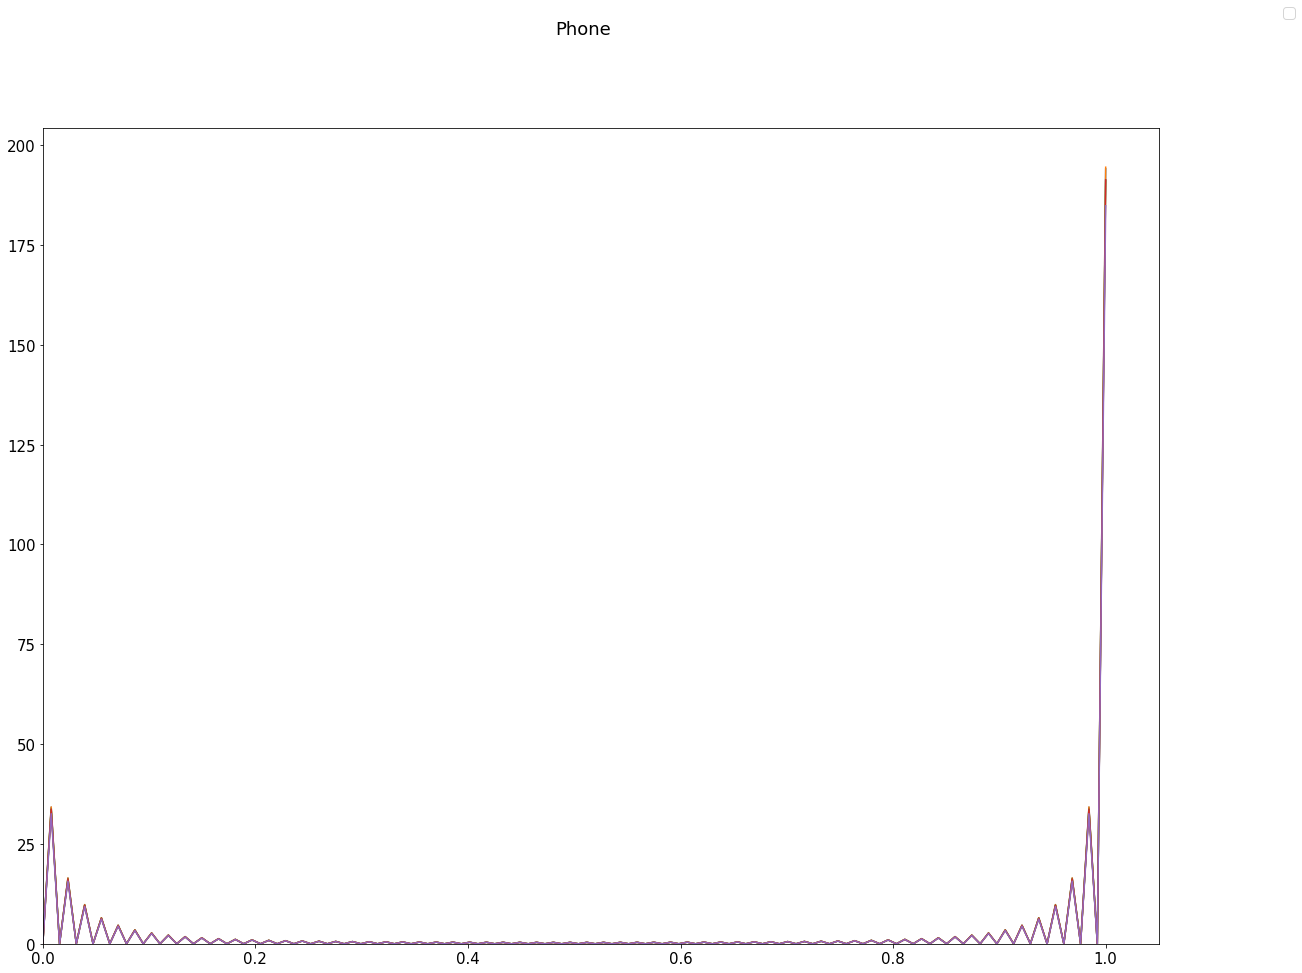

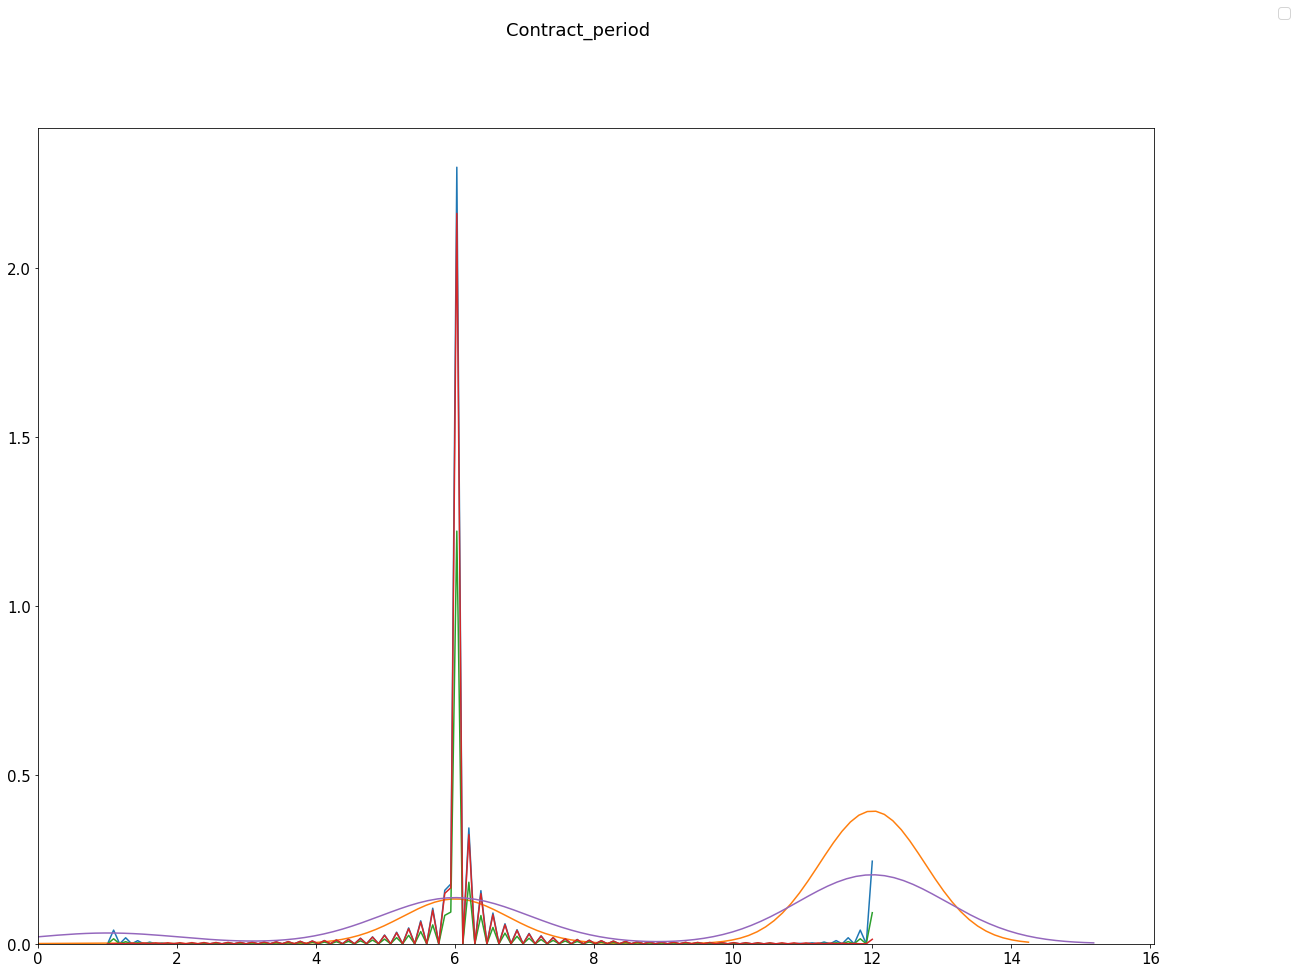

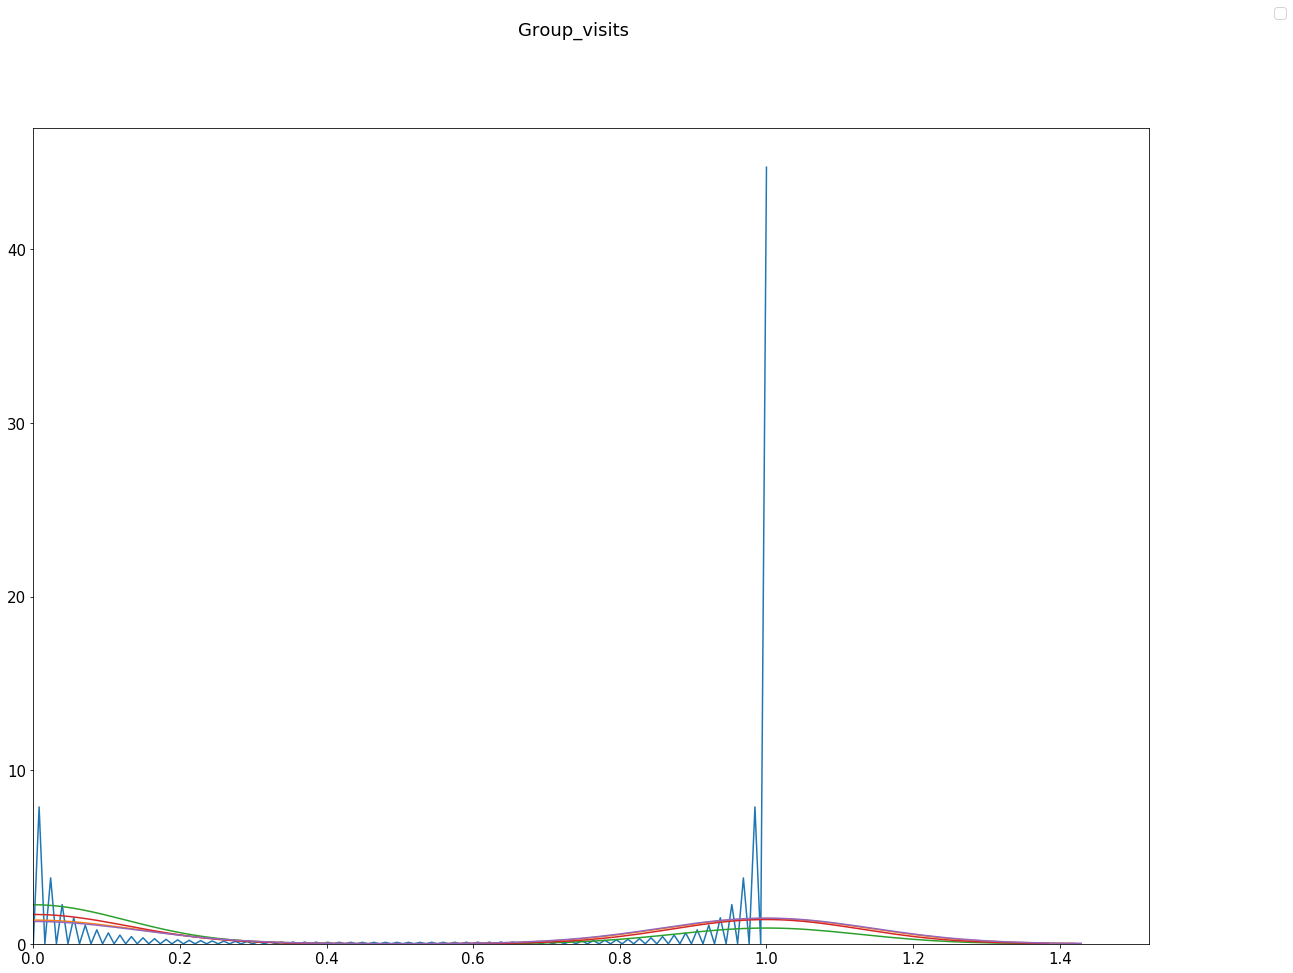

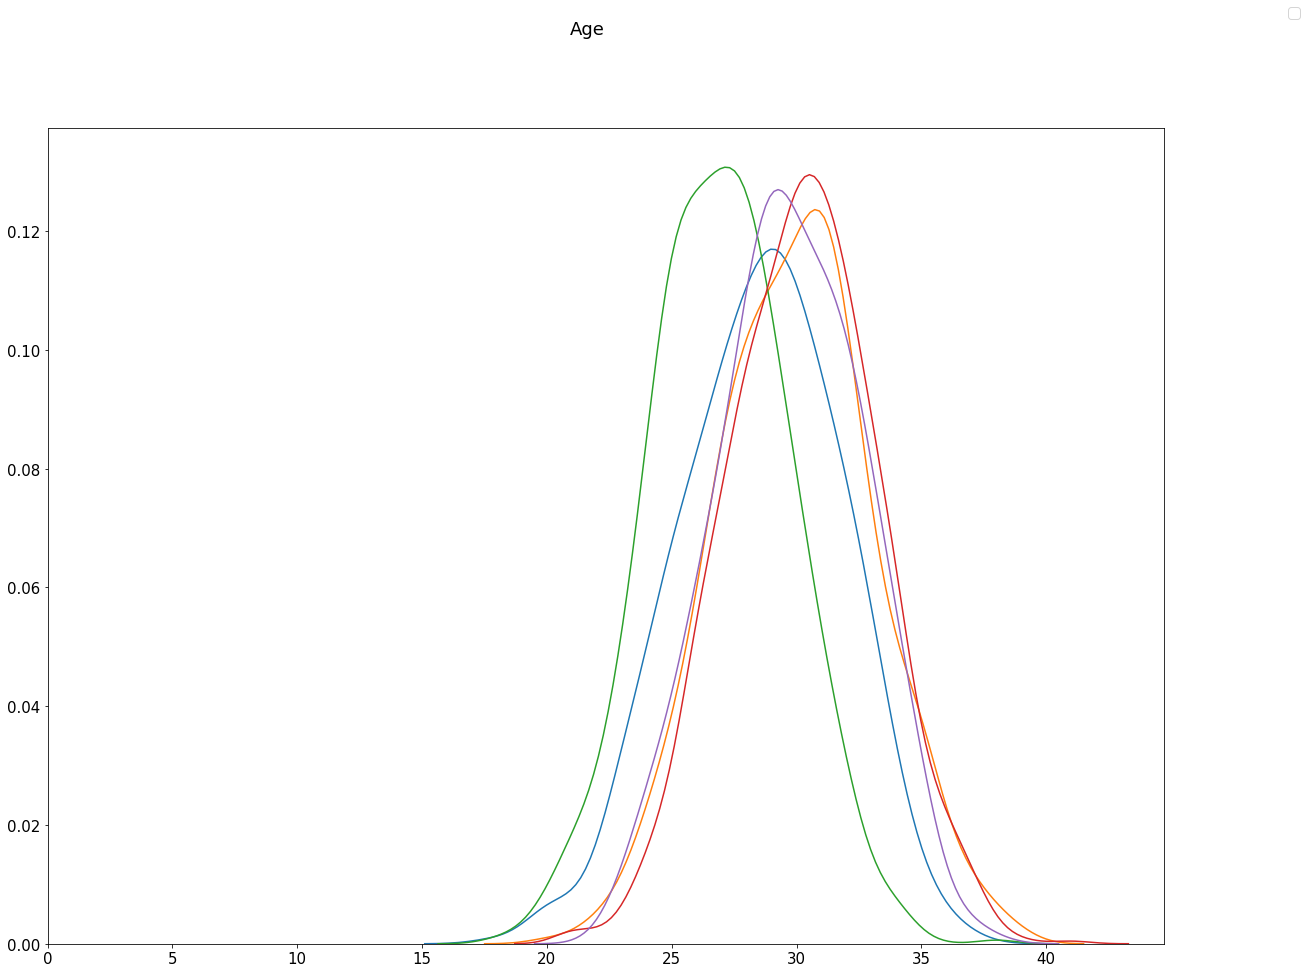

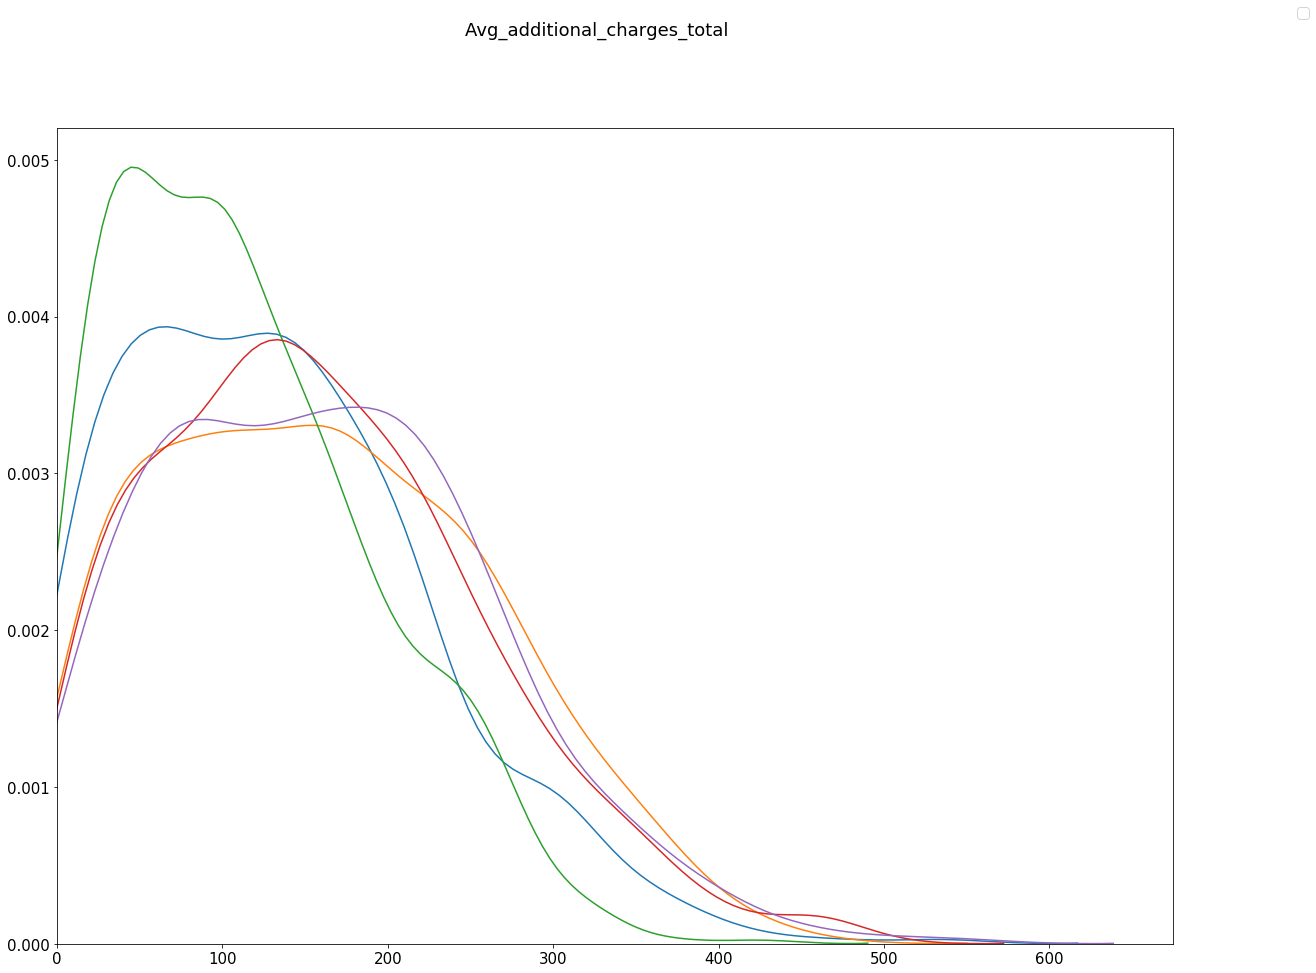

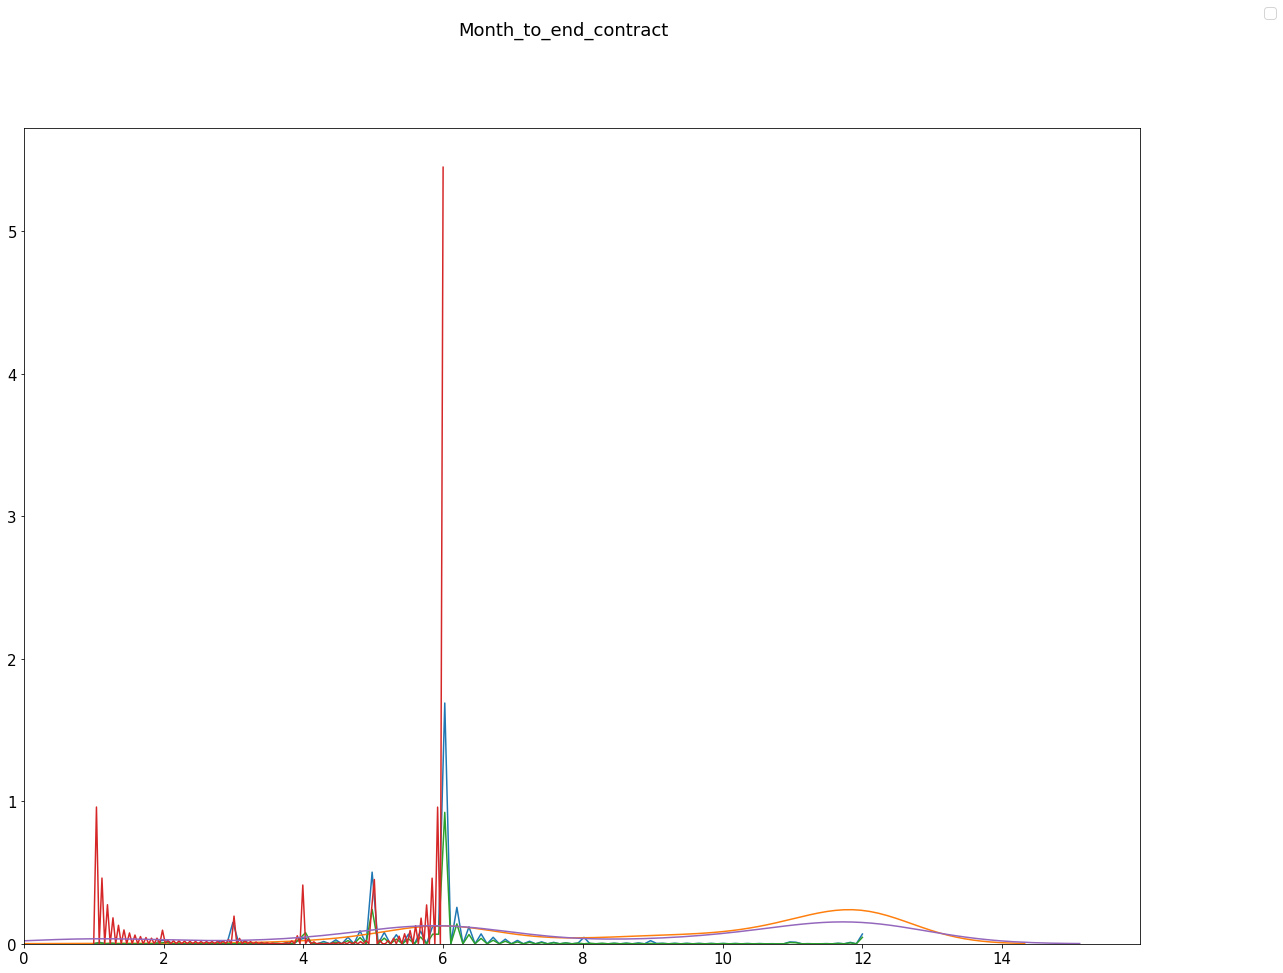

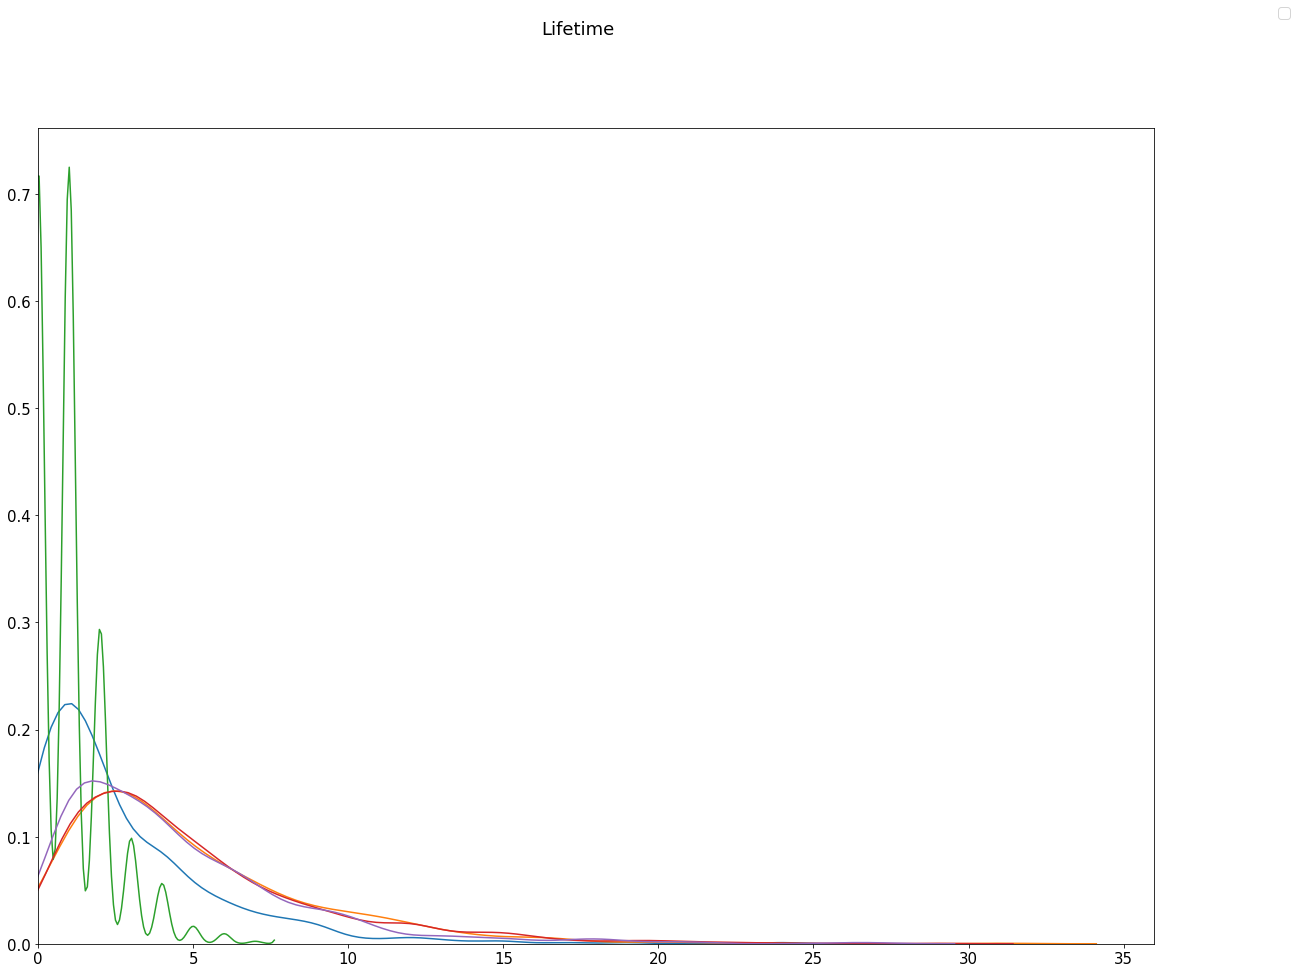

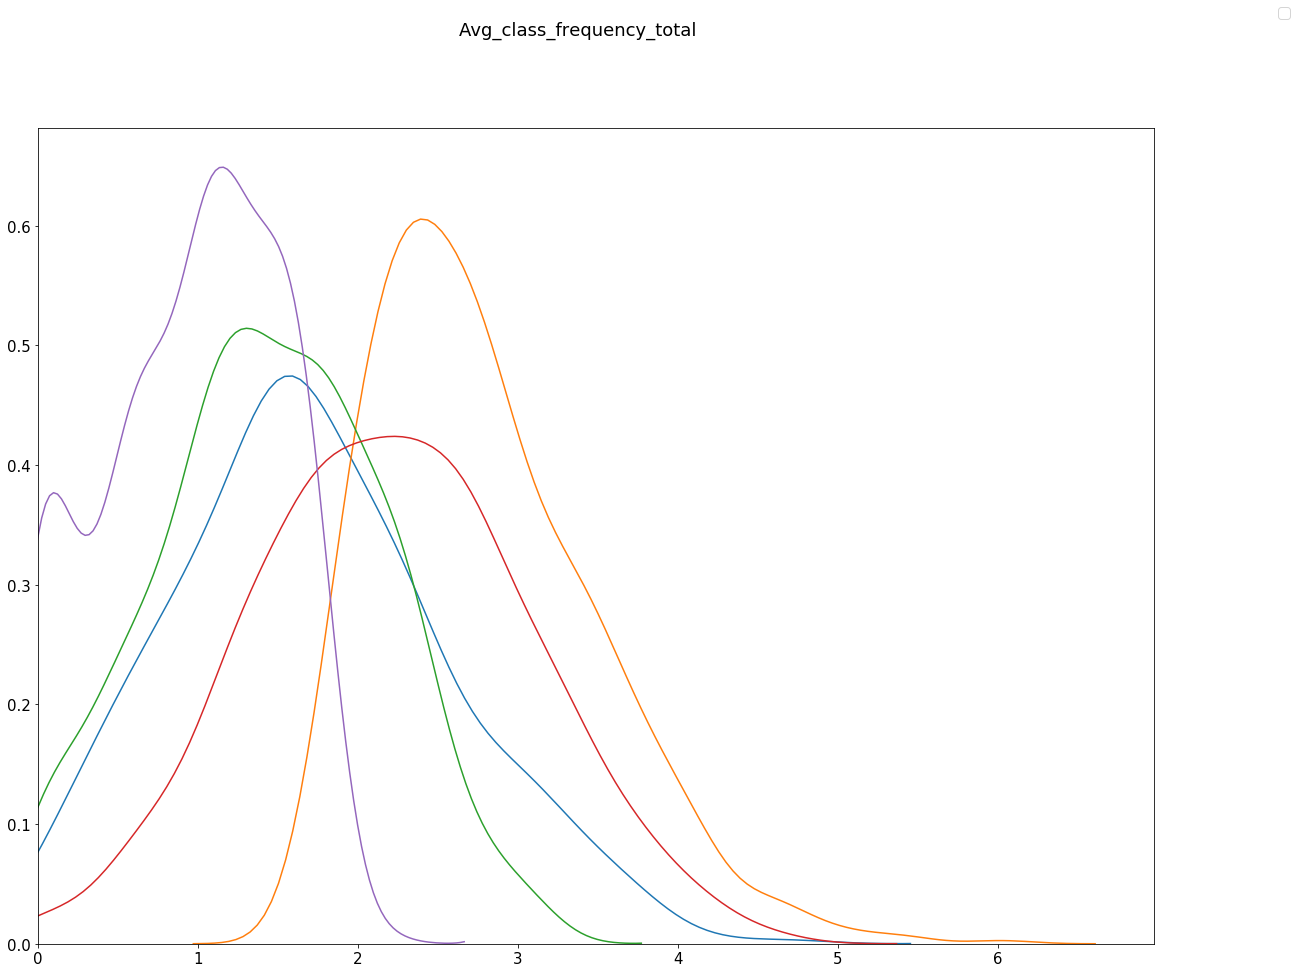

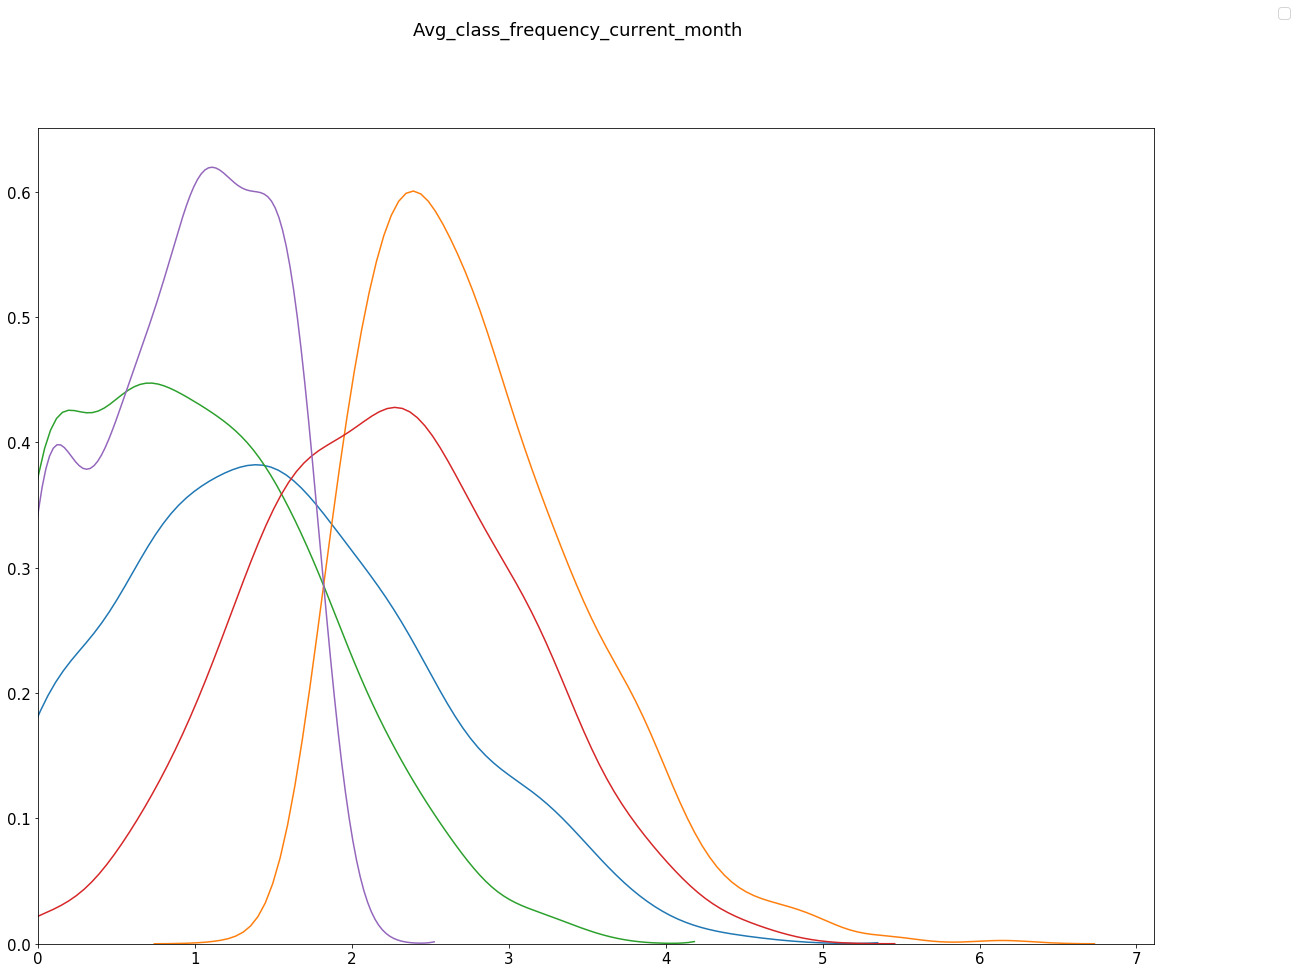

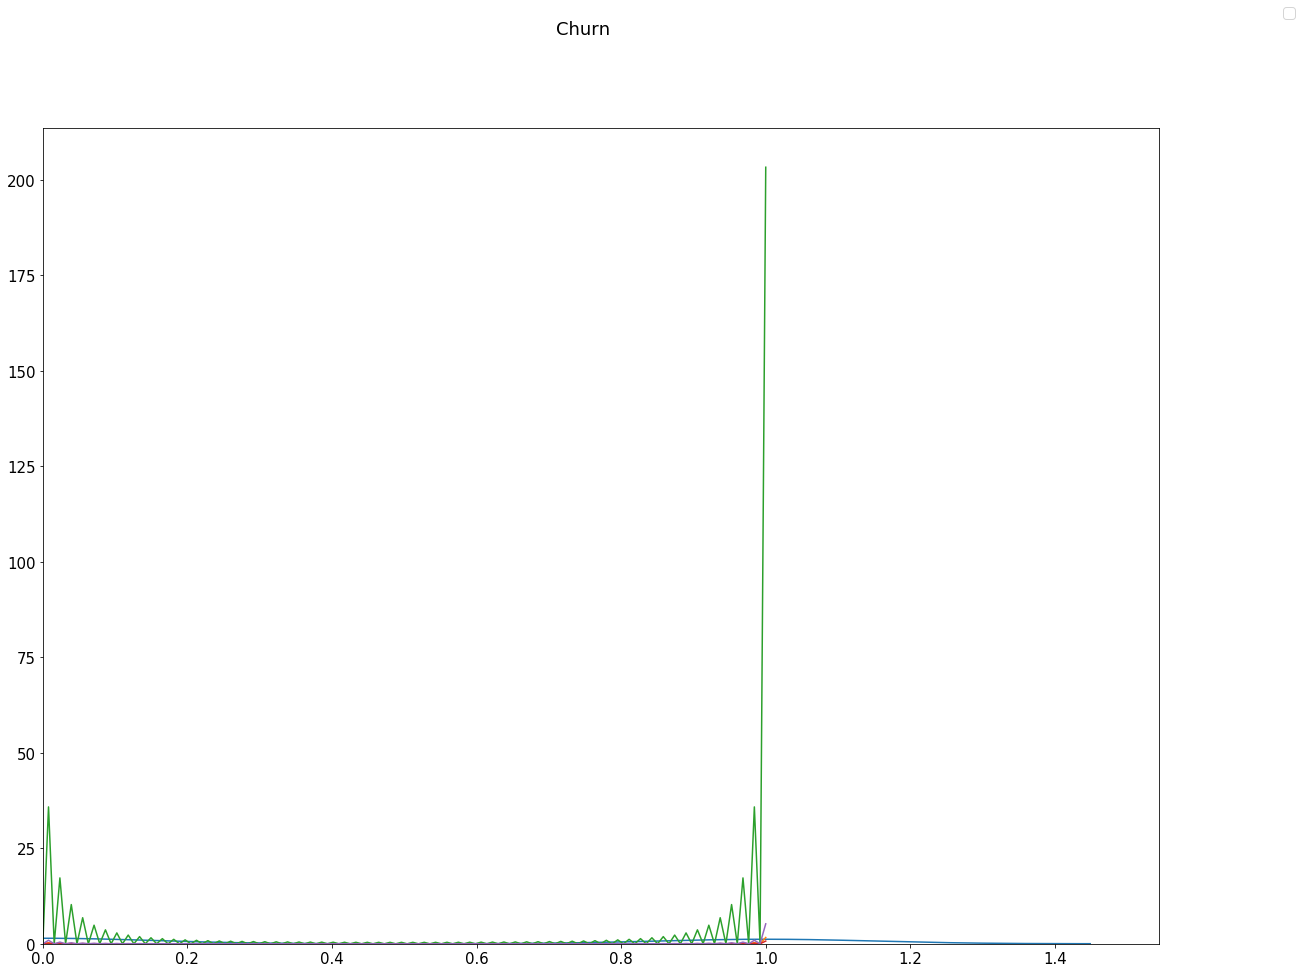

In [20]:
def feature_distribution(df, cluster_name):
    unique_vals = np.sort(df[cluster_name].unique())
    
    targets = [df.loc[df[cluster_name] == val] for val in unique_vals]
    for (column_name, column_data) in df.iteritems():
        if column_name == cluster_name:
            continue
        fig = plt.figure(figsize=(20,15))
        for target in targets:
            sns.distplot(target[[column_name]], hist=False)
        fig.legend(labels=unique_vals)
        fig.suptitle(column_name)
        plt.xlim(left=0)
        plt.show()


feature_distribution(cluster_df, 'cluster_churn')        

### Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?

In [21]:
cluster_df.groupby('cluster_churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_churn,,,,,,,,,,,,,,
0,0.503676,0.000000,0.459559,0.075368,0.917279,2.069853,0.211397,28.522059,132.741216,1.950368,2.757353,1.706629,1.515890,0.450368
1,0.492829,0.936115,0.764016,0.534550,0.919166,10.447197,0.516297,29.962190,161.853561,9.477184,4.833116,2.788103,2.786919,0.007823
2,0.507917,1.000000,0.323995,0.213155,0.903776,1.546894,0.287454,26.926918,113.173051,1.500609,1.031669,1.449720,1.037592,0.961023
3,0.521186,0.996610,0.282203,0.208475,0.904237,1.882203,0.452542,30.237288,157.988625,1.794915,4.923729,2.203432,2.207359,0.003390
4,0.518895,0.968023,0.744186,0.526163,0.873547,8.859012,0.534884,29.728198,162.907495,8.155523,4.411337,0.957744,0.943967,0.024709


<span style="background-color: #FFFF00">We can see that Customers from 3rd cluster leave the gym with 96% likelihood<br> Also:<br> They have the shortest average contract period<br> They spend less money on additional products<br> They are of the yunger age then others, 27 years old<br>Those customers usually leave after the first month<br> Additionaly, Customers from the 4th cluster have 50% likelyhood to leave<br> Finally, Customers from 1st and 3rd clusters are the most loyal</span>

<div class="alert alert-danger">
    <s>You successfully found the clusters, but unfortunately the numbers in the conclusions are different from those in the code output (and I didn't even rerun the notebook). I suggest setting a random_state, so that your research is reproducible.
</div>


<div class="alert alert-success">
    <b>V2.</b>
    Ok, fixed!
</div>


## Conclusion and Marketing Advises
<span style="background-color: #FFFF00"> Recommendations regarding the strategy for customer interaction and retention.<br>1.Stimmulate customers involvment in promo "Bring Friend" it's influence higher likelyhood customers will stay longer with us because it ensure motivation and involvments of new customers to stick with the gym since they have friend who had been visiting already Aka "workout body"<br>2. Higher promotion of Group Classes its attendence increases chanses that customer will keep visiting<br>3. Pay more attention to customers who around 27 years old becuase they more likely to leave. Offer special promo, discounts, and try to increase their involvement. 4. Stimmulate cusmorers spendings on additition products, the more they spend the mope they inolved and more likely to stay <br>5. Be coutionce about customers whose group class visits have decreaced to average once a monce because they have high likelyhood to live. Offer them some special promos and complimentary deals </span>

<div class="alert alert-success">
    Conclusions look good!
</div>